In [53]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVM add
from sklearn.svm          import SVC

# Knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier



from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml(data_id = 554)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
mnist.data.shape

(70000, 784)

In [12]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [13]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [14]:
mnist.target_names

['class']

In [17]:
mnistDF = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnistDF['target'] = mnist.target
mnistDF.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [18]:
mnistDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: float64(784), object(1)
memory usage: 419.2+ MB


In [19]:
y_target = mnistDF['target']
X_features = mnistDF.drop(['target'], axis=1, inplace=False)

In [39]:
# dataframe을 사용하지 않고 바로 가져올때
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)

In [40]:
# X의 0번째 숫자
reshape_img = X[0].reshape(28, 28)
reshape_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

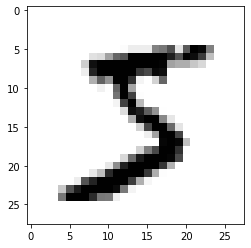

In [41]:
plt.imshow(reshape_img, cmap = matplotlib.cm.binary)
plt.show()

In [25]:
# 0번째 숫자의 정답
y[0]

'5'

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [44]:
# 학습 데이터 shuffle
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[shuffle]

In [30]:
# 테스트 데이터
X_test, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['7', '2', '1', ..., '4', '5', '6'], dtype=object))

In [45]:
dt = DecisionTreeClassifier(random_state=35)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('tree : ', accuracy_score(y_test, dt_pred))

tree :  0.8812


In [46]:
# 7만 구별하는 이진분류 해보기
y_train_seven = (y_train == 7)

In [47]:
# 확률적 경사하강법(SGD)
from sklearn.linear_model import SGDClassifier

sdg_model = SGDClassifier(random_state=50)
sdg_model.fit(X_train, y_train_seven)

SGDClassifier(random_state=50)

In [50]:
# 예측
sdg_model.predict([X[1]])

array([False])

In [55]:
# 교차검증 --> cross_val_score()
scores = cross_val_score(sdg_model, X_train, y_train_seven, cv=5, scoring='accuracy')
scores

array([0.97375   , 0.9765    , 0.96333333, 0.97616667, 0.98183333])

In [57]:
np.mean(scores)

0.9743166666666667

In [56]:
# 결정계수
y_scores = cross_val_predict(sdg_model, X_train, y_train_seven, cv=5, method='decision_function')
y_scores

array([ -9977.79209428,  -6790.404322  , -40297.7798846 , ...,
       -11762.57106054, -31479.16241199, -10820.92311167])

In [59]:
precision, recall, thresholds = precision_recall_curve(y_train_seven, y_scores)
precision, recall, thresholds

(array([0.12812909, 0.12811126, 0.12811388, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99840383e-01, 9.99840383e-01, ...,
        3.19233839e-04, 1.59616919e-04, 0.00000000e+00]),
 array([-36215.72487003, -36214.97658309, -36214.82766092, ...,
         38104.67154021,  39529.81112827,  40055.93076953]))

In [60]:
precision.shape, recall.shape, thresholds.shape

((48897,), (48897,), (48896,))

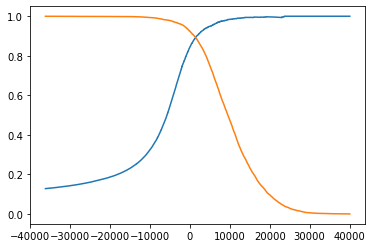

In [63]:
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.show()